In [19]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing

In [14]:
df_all = pd.read_csv('tiobeindex2.csv')
df = df_all['Python']
df.head()

0    1.25
1    1.13
2    1.20
3    1.17
4    1.28
Name: Python, dtype: float64

In [15]:
ses = SimpleExpSmoothing(df)
model = ses.fit(optimized=True)
forecast = model.forecast(7)
forecast

281    21.9
282    21.9
283    21.9
284    21.9
285    21.9
286    21.9
287    21.9
dtype: float64

In [16]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

ses = SimpleExpSmoothing(train)
model = ses.fit(optimized=True)

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 3.8451483935064217, MSE: 21.535171294937715, RMSE: 4.640600316223938


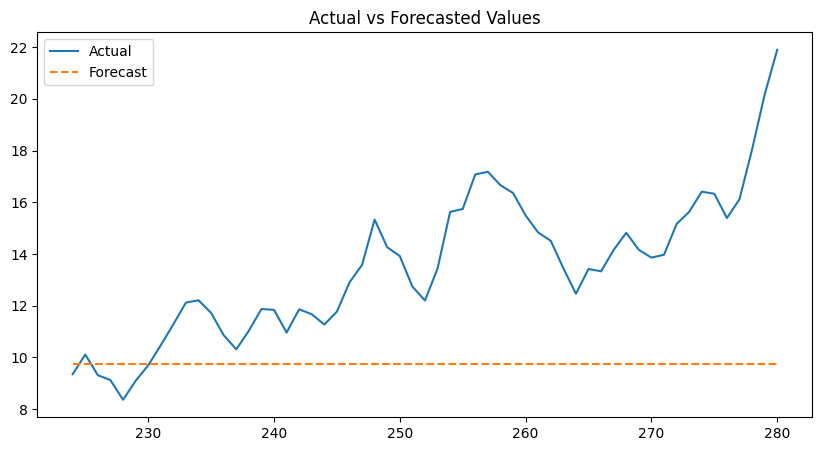

In [17]:
# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values")
plt.show()


In [18]:
languages = list(df_all.columns)
languages.remove('Month')

d = {}
d['language']=[]
d['mae'] = []
d['mse'] = []
d['rmse'] = []

for language in languages:
    df1=df_all[language]
    ses = SimpleExpSmoothing(df1)
    model = ses.fit(optimized=True)
    forecast = model.forecast(7)

    train_size = int(len(df1) * 0.8)
    train, test = df1[:train_size], df1[train_size:]

    ses = SimpleExpSmoothing(train)
    model = ses.fit(optimized=True)

    forecast = model.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

    d['language'].append(language)
    d['mae'].append(mae)
    d['mse'].append(mse)
    d['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(d)
df_res.to_csv('result_exponentialsmooth.csv',index=False)


MAE: 3.8451483935064217, MSE: 21.535171294937715, RMSE: 4.640600316223938
MAE: 3.4787613599128844, MSE: 16.20997807536945, RMSE: 4.026161705069662
MAE: 5.443684215375726, MSE: 34.41598777558984, RMSE: 5.866514107678412
MAE: 2.868771932083347, MSE: 12.171266689646046, RMSE: 3.488734253227959
MAE: 1.0140350893009242, MSE: 1.480814042673773, RMSE: 1.216887029544556
MAE: 0.45534343769883057, MSE: 0.35715227522705273, RMSE: 0.5976221843498221
MAE: 2.883836557070277, MSE: 10.15651609896313, RMSE: 3.186928944762203
MAE: 0.39052631435164226, MSE: 0.25166666550280753, RMSE: 0.5016638969497481
MAE: 0.5419435160169018, MSE: 0.4830430071015845, RMSE: 0.6950129546286058
MAE: 0.2509586073780044, MSE: 0.09969024156816478, RMSE: 0.31573761506694886
MAE: 0.2655089877105793, MSE: 0.11905424967350385, RMSE: 0.3450423882271624
MAE: 0.23713341762839363, MSE: 0.08638720415286696, RMSE: 0.2939170021500406
MAE: 0.3284464564906835, MSE: 0.16909769210991024, RMSE: 0.41121489772369657
MAE: 0.3469806685702731, MS